In [1]:
using DelimitedFiles
using Formatting: printfmt
using Plots
using ScHoLP
using Statistics

# Load true output and estimated output.

In [4]:
dataset_name = "email-Enron"

true_filename = "../output/geom_mean_exact_$dataset_name.txt"
estimated_filename = "../output/geom_mean_sampling_$dataset_name.txt"
wr_estimated_filename = "../output/geom_mean_sampling_wr_$dataset_name.txt"

true_file = open(true_filename, "r")
estimated_file = open(estimated_filename, "r")
wr_estimated_file = open(wr_estimated_filename, "r")

true_output = readdlm(true_file)
estimated_output = readdlm(estimated_file)
wr_estimated_output = readdlm(wr_estimated_file)

close(true_file)
close(estimated_file)
close(wr_estimated_file)

l = size(true_output)[1]
true_triangles, true_time = true_output[1:l-1, :], true_output[l, :][2]
true_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), true_triangles[:, 2])
true_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 3])
true_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 4])
tmp = []
for i in range(1, stop=l-1)
    w, a, b, c = true_triangles[i, :]
    push!(tmp, (w, (a,b,c)))
end
true_triangles = tmp

l = size(estimated_output)[1]
estimated_triangles, estimated_time = estimated_output[1:l-3, :], estimated_output[l-2, 2]
estimated_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), estimated_triangles[:, 2])
estimated_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 3])
estimated_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 4])
tmp = []
for i in range(1, stop=l-3)
    w, a, b, c = estimated_triangles[i, :]
    push!(tmp, (w, (a,b,c)))
end
estimated_triangles = tmp
k = estimated_output[l-1, 2]
kprime = estimated_output[l, 2]

l = size(estimated_output)[1]
wr_estimated_triangles, wr_estimated_time = wr_estimated_output[1:l-3, :], wr_estimated_output[l-2, 2]
wr_estimated_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), wr_estimated_triangles[:, 2])
wr_estimated_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), wr_estimated_triangles[:, 3])
wr_estimated_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), wr_estimated_triangles[:, 4])
tmp = []
for i in range(1, stop=l-3)
    w, a, b, c = wr_estimated_triangles[i, :]
    push!(tmp, (w, (a,b,c)))
end
wr_estimated_triangles = tmp

printfmt("kprime: {}, k: {}\n", kprime, k)

kprime: 500, k: 25


# Plot distribution of means in the true and estimated outputs.

There are a total of 9895 triangles in this graph.
μ = 5.1738777156823454, σ = 2.9375259667965476


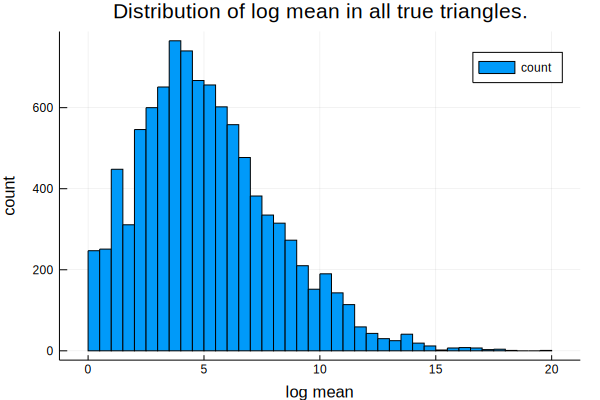

In [5]:
all_true = map(x->log(x[1]), true_triangles[:, 1])
number_triangles = length(all_true)
printfmt("There are a total of {} triangles in this graph.\n", number_triangles)
printfmt("μ = {}, σ = {}\n", mean(all_true), std(all_true))
histogram(all_true, bins=:auto, xlabel="log mean", ylabel="count", label="count",
         title="Distribution of log mean in all true triangles.")

μ = 16.884380067866164, σ = 0.84750086971419


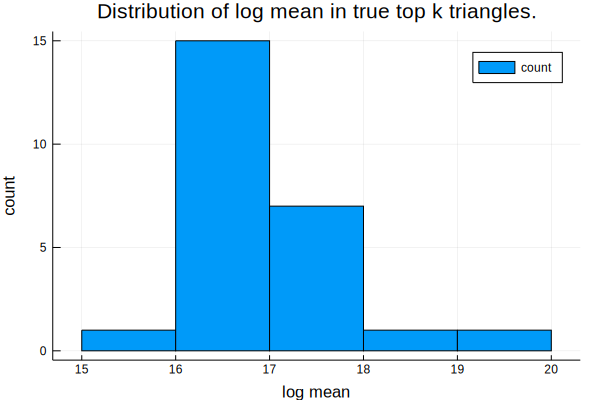

In [6]:
top_k_true = map(x->log(x[1]), true_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_true), std(top_k_true))
histogram(top_k_true, bins=:auto, xlabel="log mean", ylabel="count", label="count",
         title="Distribution of log mean in true top k triangles.")

μ = 10.411014892175997, σ = 0.26682097751116335


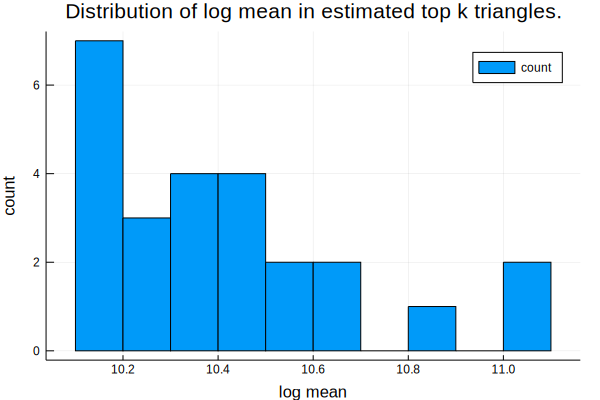

In [7]:
top_k_estimated = map(x->log(x[1]), estimated_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_estimated), std(top_k_estimated))
histogram(top_k_estimated, bins=10, xlabel="log mean", ylabel="count", label="count",
          title="Distribution of log mean in estimated top k triangles.")


μ = 10.160494138644047, σ = 0.17347674310763445


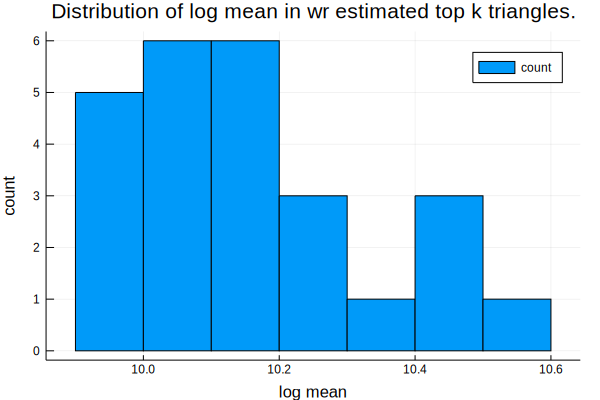

In [8]:
top_k_wr_estimated = map(x->log(x[1]), wr_estimated_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_wr_estimated), std(top_k_wr_estimated))
histogram(top_k_wr_estimated, bins=10, xlabel="log mean", ylabel="count", label="count",
          title="Distribution of log mean in wr estimated top k triangles.")

# What is the distribution of ranks of estimated triangles?

In [9]:
function find_rank(t)
    return searchsorted(true_triangles, t, by=x->x[1], rev=true)[1]
end

estimated_ranks = [find_rank(t) for t in estimated_triangles]
wr_estimated_ranks = [find_rank(t) for t in wr_estimated_triangles]
;

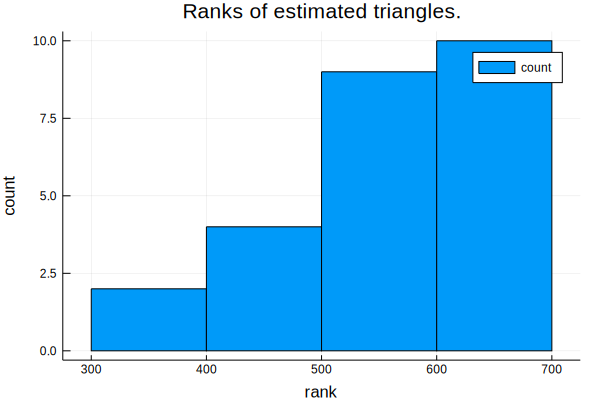

In [10]:
histogram(estimated_ranks, bins=:auto, xlabel="rank", ylabel="count", label="count",
          title="Ranks of estimated triangles.")

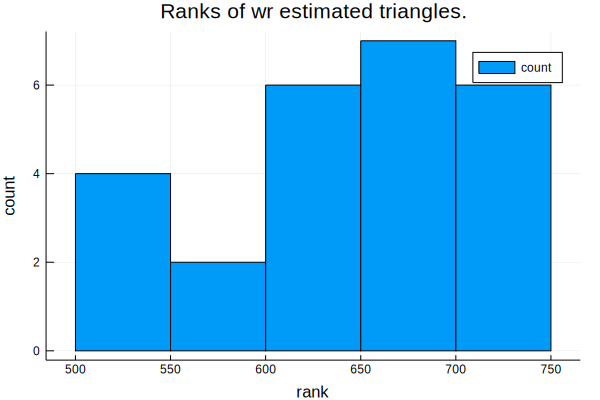

In [11]:
histogram(wr_estimated_ranks, bins=:auto, xlabel="rank", ylabel="count", label="count",
          title="Ranks of wr estimated triangles.")

# What is the distribution of percentile of the estimated triangles?

In [12]:
estimated_percentiles = [1 - r/number_triangles for r in estimated_ranks]
wr_estimated_percentiles = [1 - r/number_triangles for r in wr_estimated_ranks]
;

Estimated triangles
Mean percentile: 0.9434502273875693, median percentile: 0.941788782213239


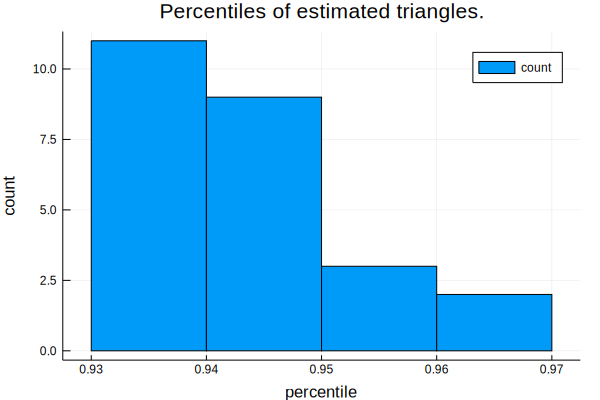

In [13]:
println("Estimated triangles")
printfmt("Mean percentile: {}, median percentile: {}\n",
         mean(estimated_percentiles), median(estimated_percentiles))
histogram(estimated_percentiles, bins=:auto, xlabel="percentile", ylabel="count", label="count",
          title="Percentiles of estimated triangles.")

Wr estimated triangles
Mean percentile: 0.934512379989894, median percentile: 0.9330975240020212


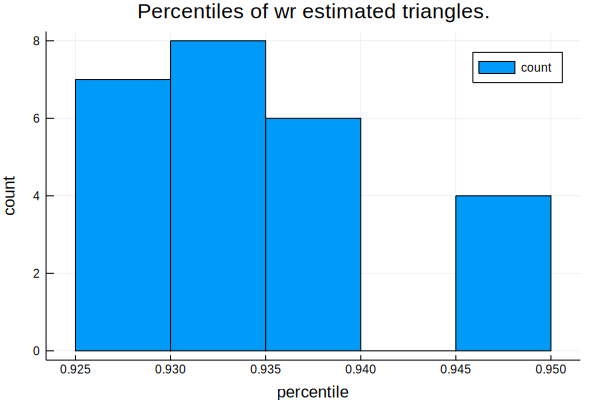

In [14]:
println("Wr estimated triangles")
printfmt("Mean percentile: {}, median percentile: {}\n",
         mean(wr_estimated_percentiles), median(wr_estimated_percentiles))
histogram(wr_estimated_percentiles, bins=:auto, xlabel="percentile", ylabel="count", label="count",
          title="Percentiles of wr estimated triangles.")

# How many of the estimated triangles are in the top k?

In [15]:
estimated_accuracy = mean([find_rank(t) <= k for t in estimated_triangles])
wr_estimated_accuracy = mean([find_rank(t) <= k for t in wr_estimated_triangles])
printfmt("Estimated accuracy: {}, wr estimated accuracy: {}\n", estimated_accuracy, wr_estimated_accuracy)

Estimated accuracy: 0.0, wr estimated accuracy: 0.0
